# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
from scipy import stats
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
df = pd.read_csv('breast-cancer-wisconsin-data.txt', header=None, 
                 names=['id','clump','cell_size','cell_shape','marginal_adhesion','epi_cell_size',
                       'bare_nuclei','bland_chromatin','nucleoli','mitoses','class'])
df.head(10)

,id,clump,cell_size,cell_shape,marginal_adhesion,epi_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
df.dtypes
# data type of bare_nuclei is object, that could be because of the presence of non-numerical value in that column

id                    int64
clump                 int64
cell_size             int64
cell_shape            int64
marginal_adhesion     int64
epi_cell_size         int64
bare_nuclei          object
bland_chromatin       int64
nucleoli              int64
mitoses               int64
class                 int64
dtype: object

In [5]:
df.shape
# 699 as mentioned in the dataset description

(699, 11)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
cell_size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
cell_shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
epi_cell_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column

if((df == '0').sum().any() > 0):
    print('Zero values are present in data')
    print((df == '0').sum())
if((df == '?').sum().any() > 0):
    print('? - Corrupted values in data')
    print((df == '?').sum())

? - Corrupted values in data
id                    0
clump                 0
cell_size             0
cell_shape            0
marginal_adhesion     0
epi_cell_size         0
bare_nuclei          16
bland_chromatin       0
nucleoli              0
mitoses               0
class                 0
dtype: int64


In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?

In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [10]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?', '0')
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

In [11]:
# Instead of removing corrupted rows, imputing the values would be better
print(df.groupby('bare_nuclei').count()['id'])
print('Mean:',np.mean(df.bare_nuclei))
print('Median:',np.median(df.bare_nuclei))

bare_nuclei
0      16
1     402
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
10    132
Name: id, dtype: int64
Mean: 3.463519313304721
Median: 1.0


In [12]:
# As most of the records have got bare_nuclei as 1, we shall replace with 1 (median, which is also the mode)
df['bare_nuclei'] = df['bare_nuclei'].replace(0, 1)
print(df.groupby('bare_nuclei').count()['id'])

bare_nuclei
1     418
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
10    132
Name: id, dtype: int64


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [13]:
# Check for correlation of variable
df_n = df.drop('id', axis=1)
df_n.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,clump,cell_size,cell_shape,marginal_adhesion,epi_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
clump,1.0,0.64,0.65,0.49,0.52,0.59,0.56,0.54,0.35,0.72
cell_size,0.64,1.0,0.91,0.71,0.75,0.69,0.76,0.72,0.46,0.82
cell_shape,0.65,0.91,1.0,0.68,0.72,0.71,0.74,0.72,0.44,0.82
marginal_adhesion,0.49,0.71,0.68,1.0,0.6,0.67,0.67,0.6,0.42,0.7
epi_cell_size,0.52,0.75,0.72,0.6,1.0,0.58,0.62,0.63,0.48,0.68
bare_nuclei,0.59,0.69,0.71,0.67,0.58,1.0,0.67,0.57,0.34,0.82
bland_chromatin,0.56,0.76,0.74,0.67,0.62,0.67,1.0,0.67,0.34,0.76
nucleoli,0.54,0.72,0.72,0.6,0.63,0.57,0.67,1.0,0.43,0.71
mitoses,0.35,0.46,0.44,0.42,0.48,0.34,0.34,0.43,1.0,0.42
class,0.72,0.82,0.82,0.7,0.68,0.82,0.76,0.71,0.42,1.0


In [14]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

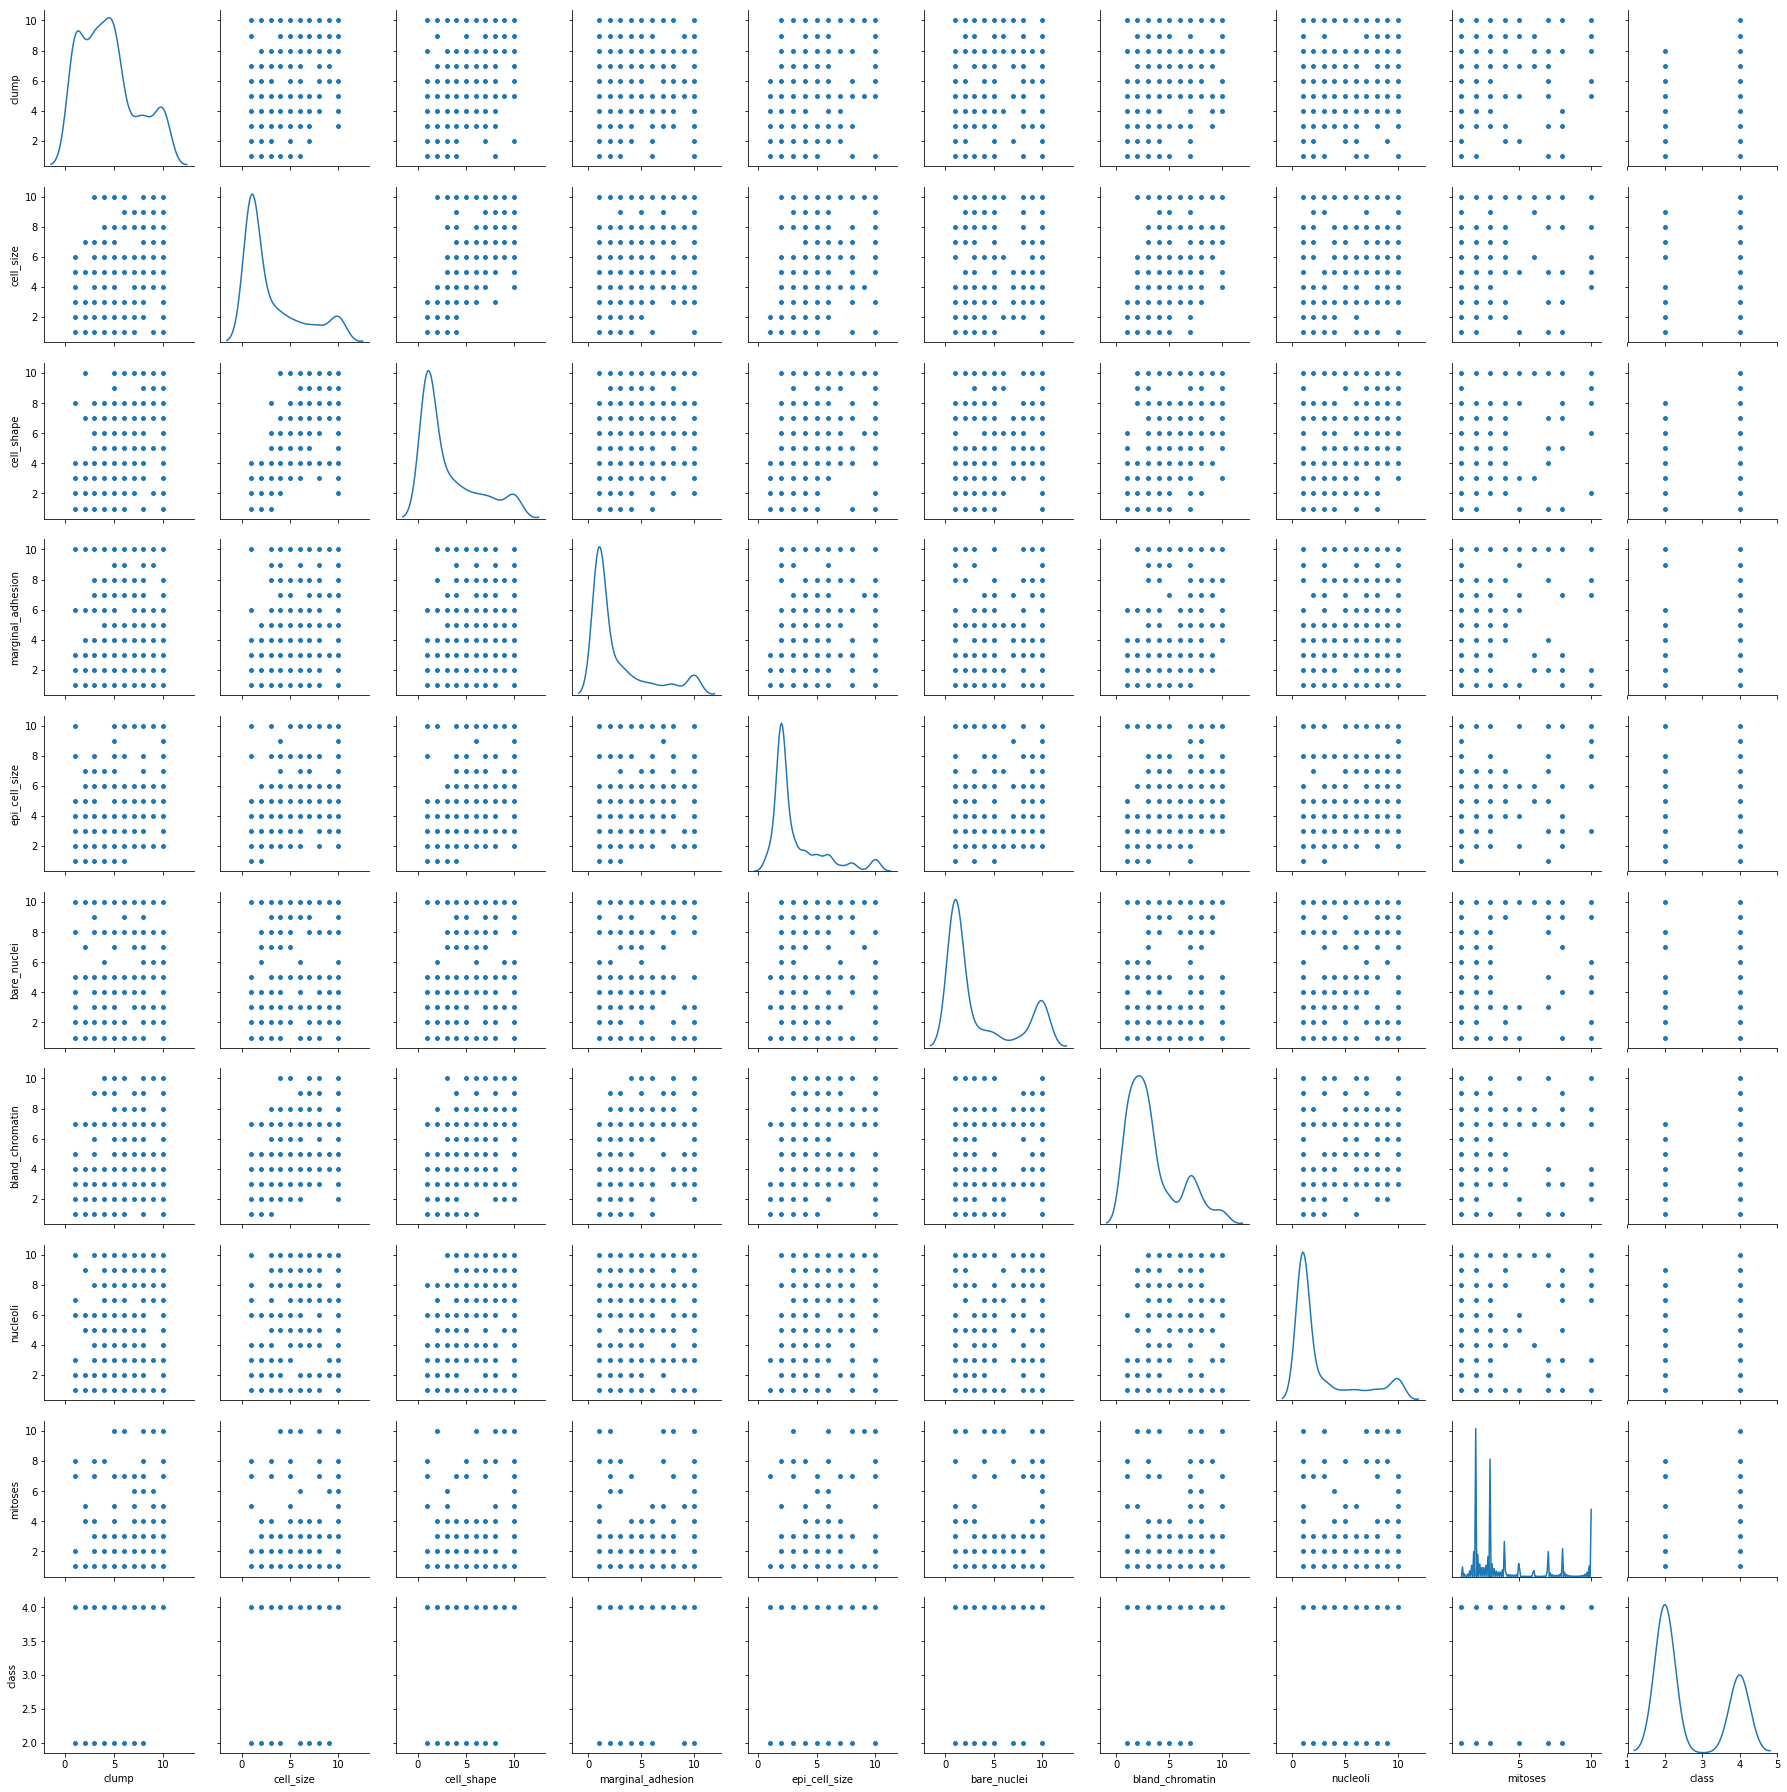

In [15]:
#Let us check for pair plots
sns.pairplot(df_n, diag_kind='kde')

In [16]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [17]:
def treat_outliers(col, df):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    lowval = q1 - 1.5* iqr
    highval = q3 + 1.5 * iqr
    loc_ret = df.loc[(df[col] > lowval) & (df[col] < highval)]
    return loc_ret

def print_outliers_count(col, df):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    lowval = q1 - 1.5* iqr
    highval = q3 + 1.5 * iqr
    df_temp = df.loc[(df[col] <= lowval) | (df[col] >= highval)]
    return df_temp.shape

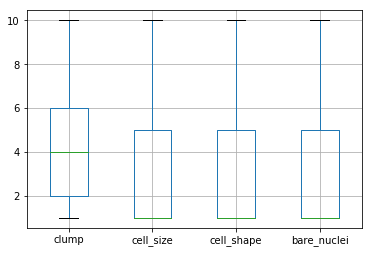

In [18]:
boxplot = df_n.boxplot(column=['clump','cell_size','cell_shape','bare_nuclei'])
# There are no outliers for the above mentioned columns 

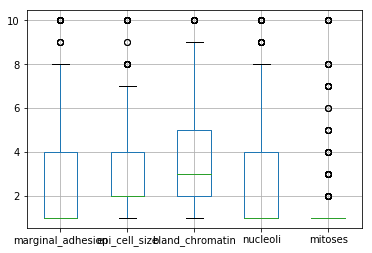

In [19]:
boxplot = df_n.boxplot(column=['marginal_adhesion','epi_cell_size','bland_chromatin','nucleoli','mitoses'])

In [20]:
for col in ['marginal_adhesion','epi_cell_size','bland_chromatin','nucleoli','mitoses']:
    print(col, print_outliers_count(col, df_n))

marginal_adhesion (60, 10)
epi_cell_size (66, 10)
bland_chromatin (20, 10)
nucleoli (77, 10)
mitoses (699, 10)


In [21]:
#If we treat outliers using IQR, it removes more data from dataset. So, treating outliers using z-score
df_n = df_n[(np.abs(stats.zscore(df_n)) < 3).all(axis=1)]
df_n.shape

(648, 10)

In [22]:
df_n.reset_index(inplace=True)

In [23]:
# Define features
X = df_n.iloc[:,0:9]

# Define categorical outcome 
y = df_n.iloc[:,9]

# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)

X_std.shape

(648, 9)

# Q6 Create a covariance matrix for identifying Principal components

In [24]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.0015456  -0.09617944 -0.0780043  -0.10303541 -0.05372618 -0.15187395
  -0.16822829 -0.15693503 -0.1389366 ]
 [-0.09617944  1.0015456   0.61818427  0.62410239  0.47976788  0.4926424
   0.57650829  0.54825598  0.51849178]
 [-0.0780043   0.61818427  1.0015456   0.90086598  0.69283943  0.73308212
   0.67637148  0.74671627  0.73094613]
 [-0.10303541  0.62410239  0.90086598  1.0015456   0.67104351  0.70690496
   0.68962935  0.73080354  0.72309852]
 [-0.05372618  0.47976788  0.69283943  0.67104351  1.0015456   0.59795509
   0.68575821  0.6510195   0.59378187]
 [-0.15187395  0.4926424   0.73308212  0.70690496  0.59795509  1.0015456
   0.59413265  0.62686014  0.66848411]
 [-0.16822829  0.57650829  0.67637148  0.68962935  0.68575821  0.59413265
   1.0015456   0.65916743  0.56133266]
 [-0.15693503  0.54825598  0.74671627  0.73080354  0.6510195   0.62686014
   0.65916743  1.0015456   0.66758427]
 [-0.1389366   0.51849178  0.73094613  0.72309852  0.59378187  0.66848411

# Q7 Identify eigen values and eigen vector

In [25]:
# Step 2- Get eigen values and eigen vector

In [26]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.07240244  0.98405163  0.02108834 -0.0028384   0.01758719 -0.01415502
  -0.03029107  0.05157112 -0.14785362]
 [ 0.30404839  0.02888253  0.00181467  0.84489087  0.29142445 -0.08123598
   0.21402042 -0.22939934 -0.05403903]
 [ 0.38851342  0.096568   -0.7350615  -0.08195978  0.15552379  0.02792345
  -0.26970663  0.05218945  0.43848188]
 [ 0.38547796  0.06721432  0.66955765 -0.03207777  0.15407357  0.04588582
  -0.29835882  0.19074723  0.49629213]
 [ 0.33974435  0.11383665  0.04635333 -0.13645063 -0.60289132 -0.02072819
   0.48336384 -0.41293512  0.28772203]
 [ 0.34478149 -0.03052117  0.05953373 -0.34173211  0.23750272 -0.7152821
  -0.10166044 -0.26655305 -0.3323367 ]
 [ 0.34520047 -0.0478843  -0.0577576   0.22822329 -0.5407024  -0.19566241
  -0.13577023  0.61855876 -0.30237487]
 [ 0.35856696 -0.02652548  0.04262994 -0.07172874 -0.0860766   0.59167006
  -0.39565265 -0.37155476 -0.46009478]
 [ 0.34748007 -0.00884348 -0.00910989 -0.29287281  0.3836436   0.2998328

# Q8 Find variance and cumulative variance by each eigen vector

In [27]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[5.594004110025793, 0.9961904250046439, 0.5709164222584293, 0.5155505431560266, 0.3616295349005248, 0.3150969753471279, 0.285723943346513, 0.27729293575276887, 0.09750546569500054]


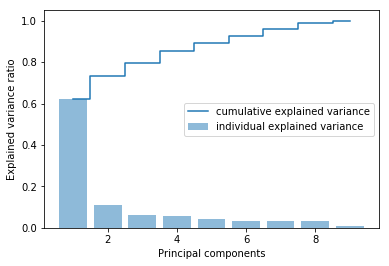

In [28]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


# The plot shows that the first principal component alone accounts for 65 percent of the variance. 
# Rest of principal components seems to be equally distributed. 
# Still the last principal component's contribution is lesser than 2 percent. So, that could be dropped

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [29]:
x_std = StandardScaler().fit_transform(X)

In [30]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x_std)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
principal_df.shape

(648, 8)

# Q10 Find correlation between components and features

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(principal_df, y, test_size=0.20, random_state=7)

In [32]:
pc_df = pd.concat([principal_df, df_n[['class']]], axis = 1)

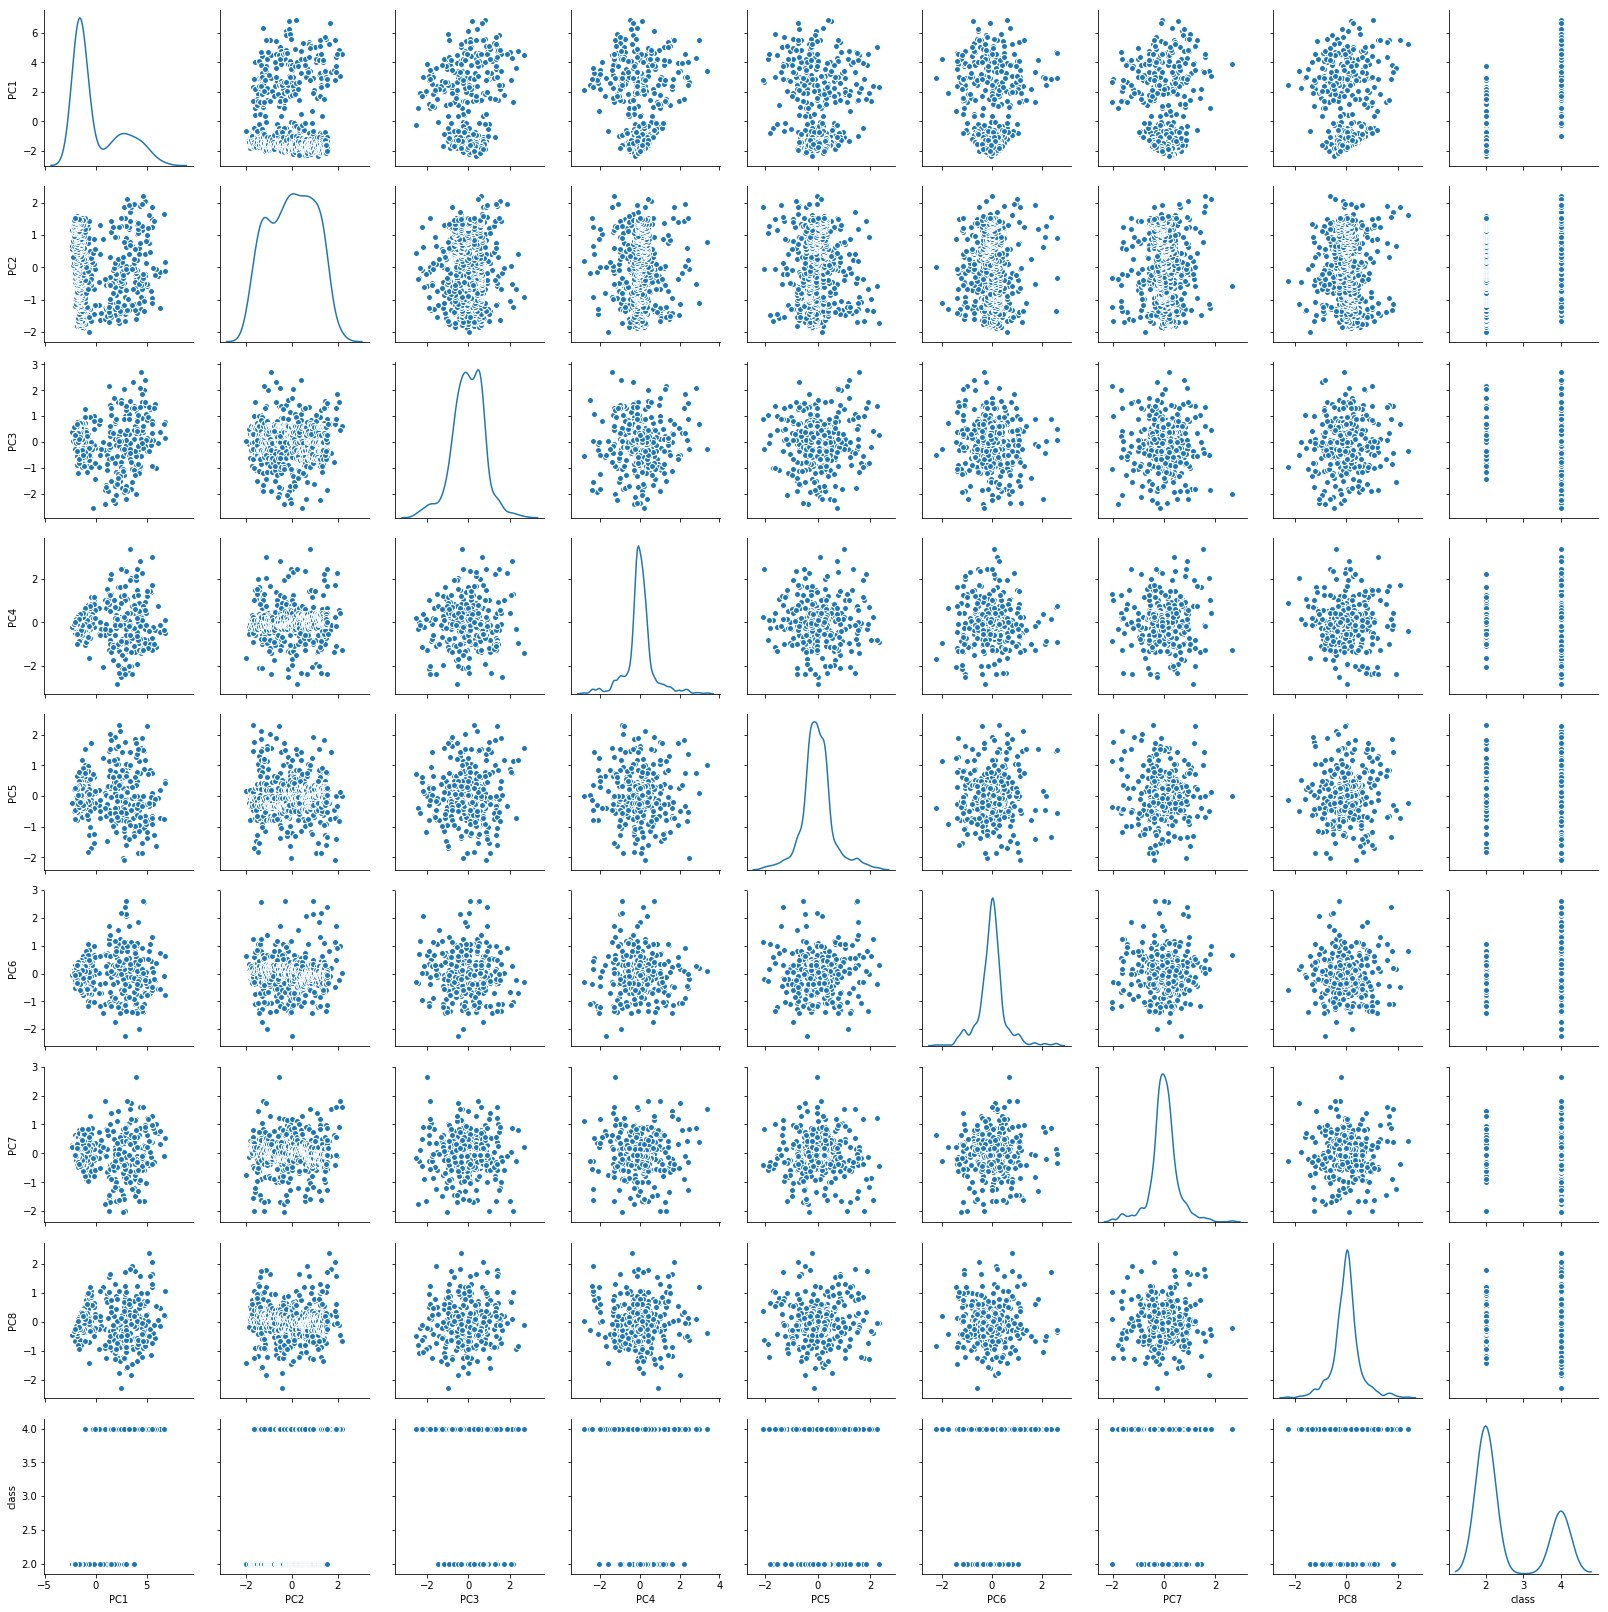

In [33]:
sns.pairplot(pc_df, diag_kind='kde')

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test , y_test)

0.8538461538461538

In [35]:
# Doing the logistic Regression on original data
X_train_1, X_test_1, y_train_1, y_test_1 = model_selection.train_test_split(X, y, test_size=0.20, random_state=7)
model1 = LogisticRegression()
model1.fit(X_train_1, y_train_1)
model1.score(X_test_1, y_test_1)

# This seems to be lesser by 1% than what we get from PCA and dimension reduction (removed 1 PC)

0.8461538461538461

In [36]:
# Doing the logistic Regression on original data after removing the highly correlated data, gives the same result
X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(X.drop('cell_shape',axis=1), y, test_size=0.20, random_state=7)
model2 = LogisticRegression()
model2.fit(X_train_2, y_train_2)
model2.score(X_test_2, y_test_2)

0.8538461538461538

###### Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

###### Q11 Read the Dataset `movies_metadata.csv`

###### Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

###### Q13  Lets drop the null values in `description` column

###### Q14 Keep the first occurance and drop duplicates of each title in column `title`

###### Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

###### Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

###### Q17  Create cosine similarity matrix

###### Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

###### Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [37]:
df_jokes = pd.read_csv('jokes.csv')
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [38]:
ratings = df_jokes.iloc[0:200,1:101]

In [39]:
ratings.shape

(200, 100)

In [40]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [41]:
ratings.columns = range(0, 100)

In [42]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

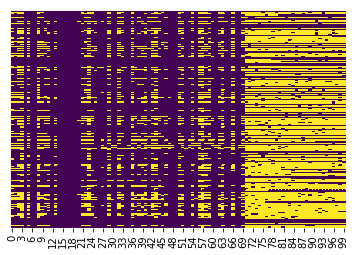

In [43]:
sns.heatmap(ratings == 99.00,yticklabels=False,cbar=False,cmap='viridis')

In [44]:
ratings = ratings.replace(99.00, 0.0)

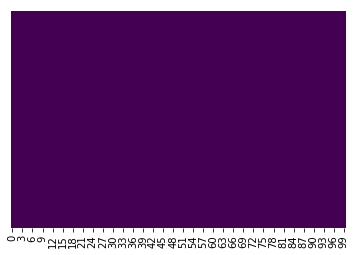

In [45]:
sns.heatmap(ratings == 99.00,yticklabels=False,cbar=False,cmap='viridis')

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [46]:
ratings_diff = StandardScaler().fit_transform(ratings)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [47]:
mean_df = pd.DataFrame(index=range(0,100),columns=['Joke Id','Mean'])
for i in range(0,100):
    mean_df.loc[[i],'Mean'] = pd.Series([np.mean(ratings[i])], index=[i])
    mean_df.loc[[i],'Joke Id'] = i

In [48]:
ordered_mean_df = mean_df.sort_values(by=['Mean'], ascending=False)
ordered_mean_df.reset_index(inplace=True)
ordered_mean_df.drop('index', axis=1, inplace=True)

In [49]:
ordered_mean_df.head(10)

,Joke Id,Mean
0,49,4.0554
1,35,3.6115
2,52,3.5715
3,34,3.22315
4,28,3.18995
5,26,3.0524
6,61,2.86185
7,48,2.85
8,31,2.77955
9,30,2.6571


In [50]:
top_10_df = ordered_mean_df.loc[0:10,:]

In [51]:
top_10_df

,Joke Id,Mean
0,49,4.0554
1,35,3.6115
2,52,3.5715
3,34,3.22315
4,28,3.18995
5,26,3.0524
6,61,2.86185
7,48,2.85
8,31,2.77955
9,30,2.6571
